#                                The Ford GoBike Dataset 

# introduction 

In our modern age with modern technology and transportation, cars aren't the only way to get around anymore. In addition to things like the rise of scooters like Lime, bike sharing has also become a recent thing in certain geographical locations. Throughout this project, we'll be specifically looking at data related to Ford GoBike. We'll look at gleaning some insights across several observations and looking at them with some data visualizations.

# The Dataset

The dataset being used in this report is bike share data sourcing from Ford GoBike, formerly known as ”Bay Area Bike Share”. The company publishes system and real-time data based on the ”General Bikeshare Feed Specification”, which allows users to query data via their maintained real-time API.


# Data Gathering 

The Data was programmatically downloaded from the the following link https://s3.amazonaws.com/baywheels-data/index.html
that included a CSV file for the year 2017, and zip files for every month till today's date.



# univariant 

### how are the ages of the riders spread?

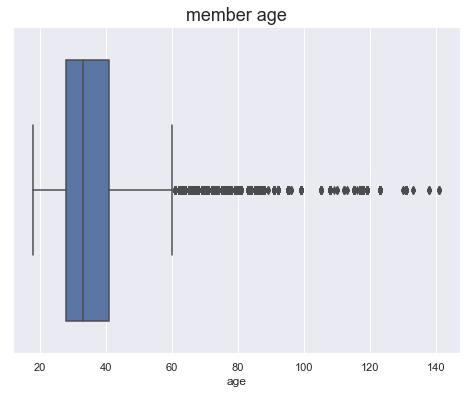

In [5]:
plt.figure(figsize = [8, 6])

sb.boxplot(data=df, x='age', color=sb.color_palette()[0]);
plt.title('Member Age', fontsize = 18);

### are the riders committed to the service?
we can safely yes, as the majority of the users are members 

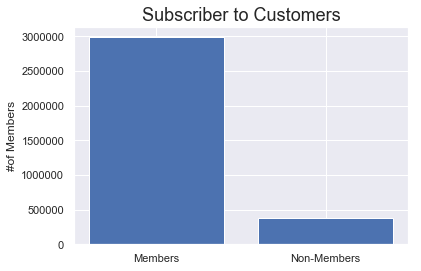

In [10]:
#Visualizing number of members vs. non-members in a pure count form
plt.bar(x = ['Members', 'Non-Members'], height = [df.user_type.value_counts()[0], df.user_type.value_counts()[1]]);
plt.title('Subscriber to Customers', fontsize = 18);
plt.ylabel('#of Members');

### what gendre uses the bikes most?
Males tend to use the sevices more than females as the chart suggests, which leads to conclude that the service is more popular amongst men


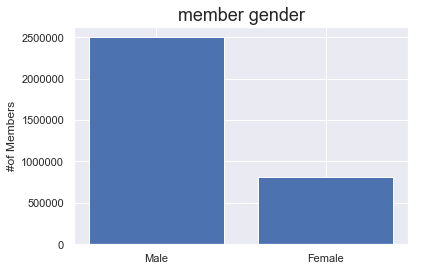

In [13]:
plt.bar(x = ['Male', 'Female'], height = [df.member_gender.value_counts()[0], df.member_gender.value_counts()[1]]);
plt.title('member gender', fontsize = 18);
plt.ylabel('#of Members');

## What riders use the bikes for?
I was curious about what would the riders use the bikes for, the chart below shows the repartition (percentage) of rides per weekdays, the percentage of rides seems to be steady on the high side during weekdays (avg~ %17) and low on the weekends (avg~ %7) which leads us to think that the bikes were used for commuting 

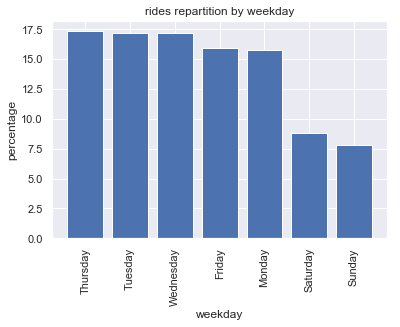

In [6]:
plt.bar(df.start_day_name.value_counts().index,df.start_day_name.value_counts()/df.start_day_name.value_counts().sum()*100);
plt.xticks(rotation=90)
plt.title('rides repartition by weekday')
plt.xlabel('weekday')
plt.ylabel('percentage')
plt.show()

## what age groupe is more likely to use the bikes?

to answer this question I plotted a pie chart, from the frist glance we can notice that the dominant that people between the age of 30-39 is dominating the chart with,second are the age groupe of ages between 20 and 29, this is backed up by stastics that suggest that the population between 30 and 44 are 50% more likely to exercise and more health conscious than other age groups.

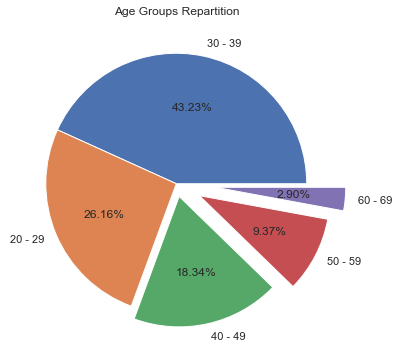

In [23]:
plt.figure(figsize=(6,6))


plt.pie(vals,labels=Labels,radius=1,autopct='%0.2f%%',explode=[0,0,0.1,0.2,0.3])
plt.title('Age Groups Repartition',loc='center')


plt.show()

# Bivariant 

### is there a difference between what days scubscribers and non subscribers use the bikes
on the right we can tell that subscribers tend to use the bikes for commuiting on weekdays and not as much on weekends, on the other hand its the total oppoise for non members, the usages of the bikes on the weekend  surpasses the weekdays which leads us to the conclusion non members uses them for leisure.

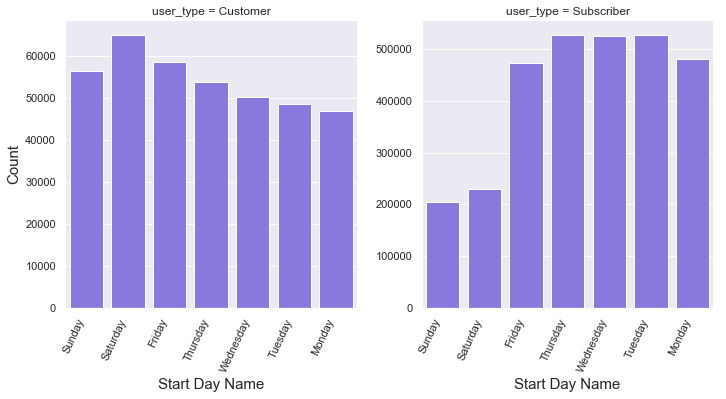

In [41]:
chart=sb.catplot(data=df, x='start_day_name', col="user_type", kind='count', sharey = False,
            color = 'mediumslateblue');
chart.set_xticklabels(rotation=65, horizontalalignment='right');
chart.set_xlabels('Start Day Name', fontsize=15)
chart.set_ylabels('Count', fontsize=15)

plt.show()


## is there a difference in between Males and Females Rides Duration

Female riders has consitanlty took longer time ride duration than their opposite sex, meaning women took longer durations
to travel same distances, this alignes by a study conducted by NCBI that suggests that man took 10% to 22% less time to cycle
identical distances

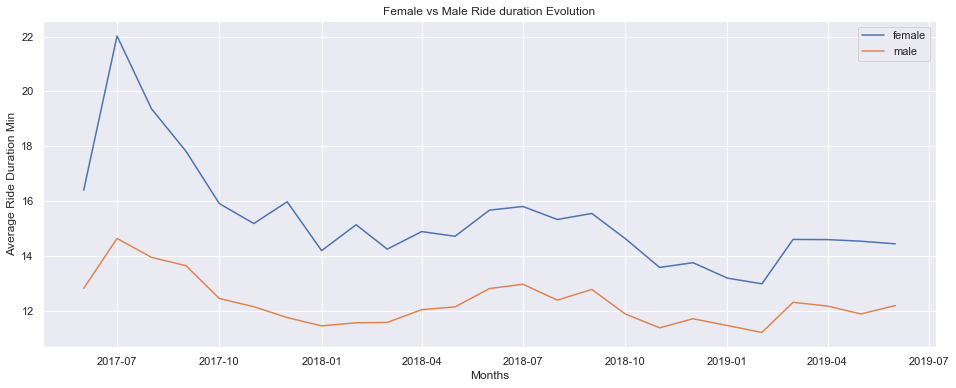

In [33]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,6))
plt.plot(malegroup.index.astype('datetime64[ns]'),femalegroup/60,label='female')
plt.plot(malegroup.index.astype('datetime64[ns]'),malegroup/60,label='male')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Average Ride Duration Min')
plt.title('Female vs Male Ride duration Evolution')
plt.show()

### Does the age of the rider effect the user type?

the overall number of subscribers for every age group is very high compared to non members, but the gap is even bigger in the population of ages between 30 and 39, so this population is more likely to commit to the service.

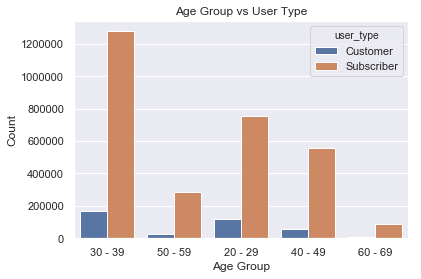

In [26]:
ax=sb.countplot(data=df,x='age_group',hue='user_type')
ax.set(xlabel='Age Group', ylabel='Count',title='Age Group vs User Type')
plt.show()

# Does the age of the rider effects the duration of the ride?
from the first glance at the scatter plot we can notice the accumulation the bottom left corner with of scatter plot, which indicates that the mojority of the population is between 20 and 40, and their ride duration is shorter.

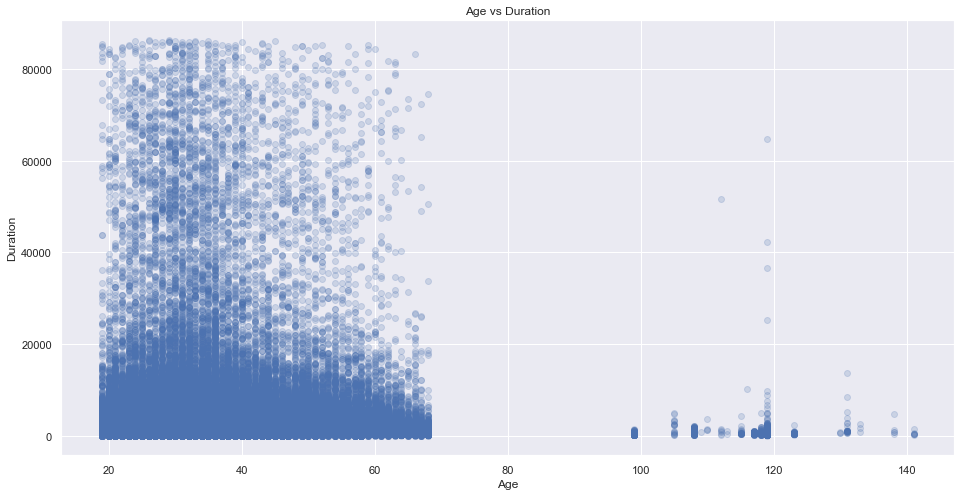

In [30]:
plt.figure(figsize=(16,8))


fig=plt.scatter(df['age'],df['duration_sec'], alpha=.2)
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age vs Duration')


plt.show()

# multivariant

## What age group rides more on a given weekday? 


the peak of rides number appears to be on Thursday lead by riders between the age sof 30 and 39 followed riders between the ages of 20 and 29

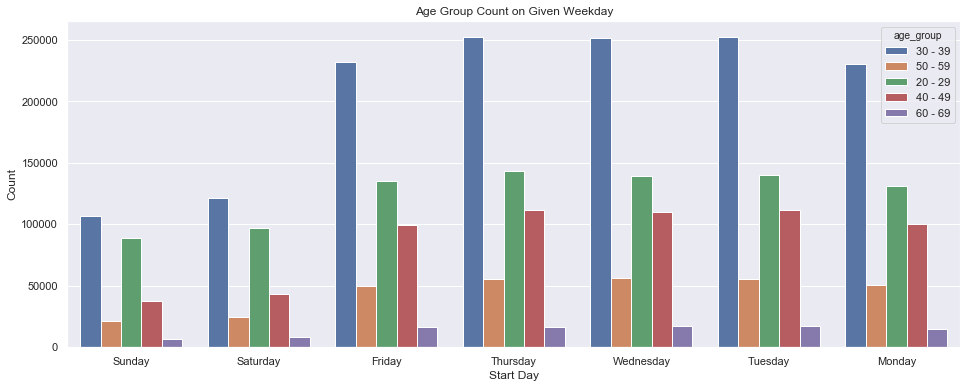

In [38]:
plt.figure(figsize=(16,6))

g=sb.countplot(data=df,x='start_day_name',hue='age_group')
g.set(xlabel='Start Day', ylabel='Count',title='Age Group Count on Given Weekday');
plt.show()

### is there a popular starting location for a gendre given a user type? 

The Caltrain Sation 2 is the most popular starting location for Men,whereas Ferry Building, Berry ST and Caltrain Sation 2 are approximalty equally the most popular starting points for women 


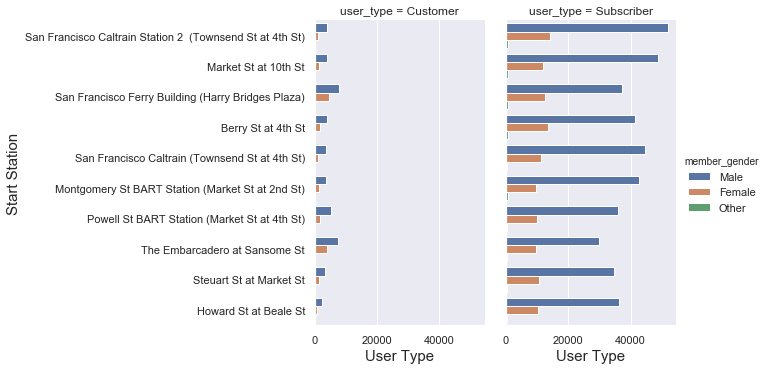

In [2]:
fig=sb.catplot(data=df,y='start_station_name',hue='member_gender',col='user_type',kind='count',order=df.start_station_name.value_counts().head(10).index);    
fig.set_xlabels('User Type', fontsize=15)
fig.set_ylabels('Start Station', fontsize=15)
plt.show()

### is there a popular starting location for a gendre given a user type? 

The Caltrain Sation 2 is the most popular starting location for Men,whereas Ferry Building, Berry ST and Caltrain Sation 2 are approximalty equally the most popular starting points for women 


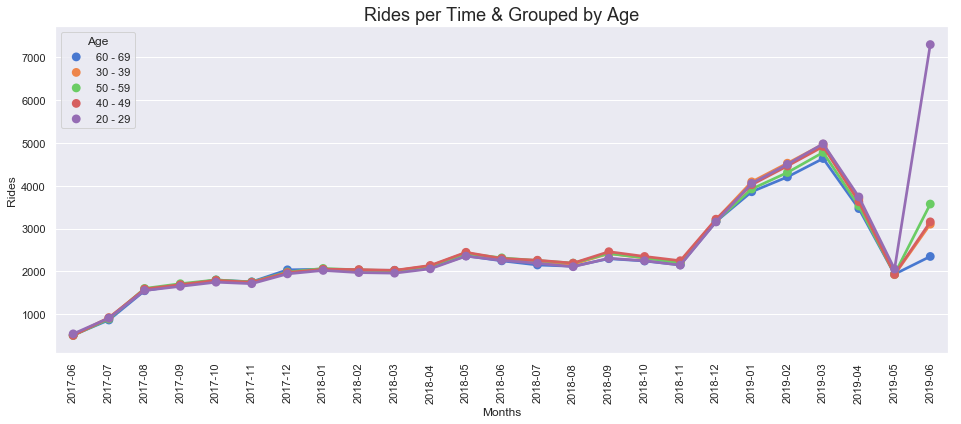

In [32]:
plt.figure(figsize=(16,6))

sb.pointplot(data = df.sort_values(by='month_year'), x = 'month_year', y = 'bike_id',
             hue = 'age_group', palette = 'muted', ci = None);
plt.xticks(rotation=90)

plt.title('Rides Per Age Group Evolution', fontsize = 18);
plt.legend(title = 'Age');
plt.title('Rides per Time & Grouped by Age', fontsize = 18);
plt.xlabel('Months');
plt.ylabel('Rides');